# Datasets and Testing Procedures

Now that we have a high level idea of a classifier, let's take a moment to go over data and datasets.

Datasets will largely vary on the sort of data they contain but for them to be injested by the classifier, they need to be numeric real values. Datasets containing text such as Natural Language Processing (NLP) tasks will need to be preprocessed and converted into feature vectors. In NLP, converting text, that is, character, words, sentences, paragraphs, documents, and etc. into numeric feature vectors is called **embeddings** which isn't within the scope of this discussion.

For now let us assume that the datasets we are working with are numeric and consists of many features. From there, datasets commonly include multiple samples or readings for a class. Additionally, the dataset contains a **truth label** indicating which class the set of features belong to. The truth label may not be present in unsupervised learning cases (which will be covered shortly).

- Dataset
  - Samples
    - Features
    - Truth Labels
    
A few things to note:
- Labeling/Annotating data is typically manual work which causes it to be time-consuming/expensive
- Not all the features provided are likely to be optimal features
- Small datasets can cause challenges as we'll discuss later


Let's look at the dataset we have have established before.

In [1]:
import numpy as np
from numpy import matlib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def gaussian_random_vectors(mean, cov, num_values, seed=None):
    n = len(mean)
    
    # get eigenvalues to compute spread
    evalues, evectors = np.linalg.eig(cov)

    # take absolute values incase eigenvalues are not positive semi-definite
    abs_values = np.abs(evalues)
    
    A = evectors * np.sqrt(abs_values)
    
    np.random.seed(seed)
    Y = np.random.randn(n, num_values)

    # transform to get target mean and covariance
    shift = np.matlib.repmat(mean, num_values, 1).T
    X = np.dot(A, Y) + shift
    
    return X

In [3]:
mean_1 = [72, 180]
cov_1 = [[1, 2], [4, 1]]  # diagonal covariance

mean_2 = [60, 150]
cov_2 = [[1, 0.1], [1, 1]]  # diagonal covariance

mean_3 = [65, 165]
cov_3 = [[8, 0.1], [2, 4]]  # diagonal covariance

mean_4 = [63, 140]
cov_4 = [[1, 0.1], [1, 5]]  # diagonal covariance

In [4]:
n_samples = 5
c1 = gaussian_random_vectors(mean_1, cov_1, n_samples)
c2 = gaussian_random_vectors(mean_2, cov_2, n_samples)
c3 = gaussian_random_vectors(mean_3, cov_3, n_samples)
c4 = gaussian_random_vectors(mean_4, cov_4, n_samples)

In [5]:
# concatenate all the data
data_samples = np.hstack((c1, c2, c3, c4))
data_labels = [1] * np.shape(c1)[1] + [2] * np.shape(c2)[1] + [3] * np.shape(c3)[1] + [4] * np.shape(c4)[1]

In [8]:
dataset = {
    'Height': data_samples[0,:],
    'Weight': data_samples[1,:],
    'Label': data_labels
}

df = pd.DataFrame(dataset)
display(df)

,Height,Weight,Label
0,71.841234,180.014100,1
1,70.640424,177.643435,1
2,74.156552,180.891904,1
3,73.777304,180.055319,1
4,73.245561,178.180129,1
5,59.973068,148.891911,2
6,59.284143,149.297971,2
7,59.799127,148.687751,2
8,60.502590,150.477476,2
9,59.411198,149.737740,2


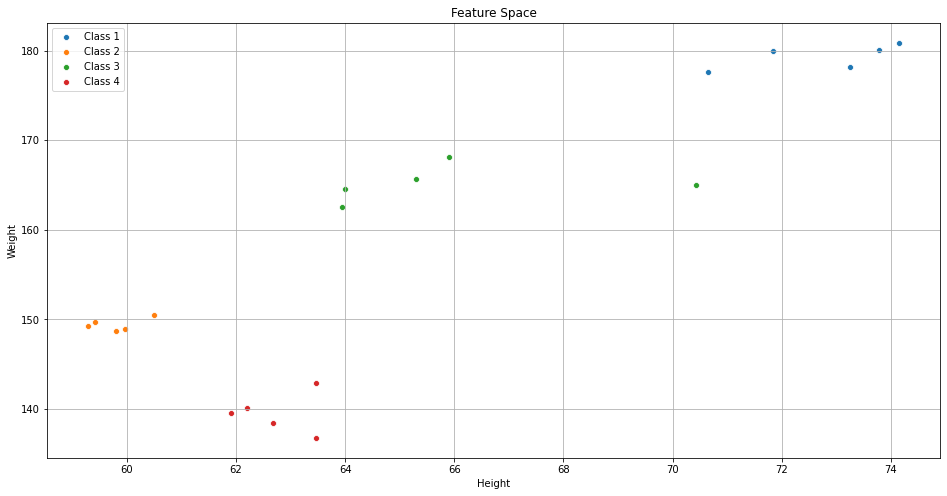

In [7]:
plt.figure(figsize=(16, 8))
for label in set(df['Label'].values):
    sns.scatterplot(
        x='Height', y='Weight',
        data=df.loc[df['Label'] == label]
    )
plt.grid()
plt.title('Feature Space')
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# Training vs Validation vs Testing

A dataset is typically divided into 3 different datasets. `Training`, `Validation`, and `Testing` datasets.

The idea behind splitting the dataset into three parts is to:
- Use the `Training` set for learning/training the model
- Use the `Validation` set for evaluating the model performance and any additional parameter tuning
- Use the `Testing` set to simulate performance as if it used for live deployment (this should be used very sparingly)

In regards to the number of samples, the training set is to be the largest and the majority of the samples from the dataset.

# Balanced Data

It is important to consider the number of samples in each class used for training. When there is an imbalance of classes in the data, the training can be skewed as it influences the frequency of which the event of the class appears. This may be intentional but will overall play an influential role on the model's accuracy. 

# Overfitting/Underfitting Data

A common occurrence that can be difficult to avoid (although there are ways to alleviate this) is that the classifier is over trained specifically to the training data. If the model will only work on the training data it is trained on causing it to perform poorly on the validation and testing data. This is known as **overfitting** a classifier. On the other side, **underfitting** data can occur if the model cannot generalize the training data well. Working with small datasets are much more prone to overfitting.

# K-Fold Cross Validation

K-Fold is a method in which the dataset is divided up into $K$ sections called folds. The folds are looped iteratively where the model is trained and tested on the fold and tested on the remaining data. The performance of the model is measured across each fold to measure the model's performance without it being as dependant on the training dataset.

K-Fold Cross Validation is particularly useful when the dataset is small and limited.

![graphics/grid_search_cross_validation.png](graphics/grid_search_cross_validation.png)